<a href="https://colab.research.google.com/github/ulya1202/NLP/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_'multillingual_ner'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

######Qissa xulase

In [ ]:
############################################### Dataset Yukle ########################################################
##-->from datasets import load_dataset--> benchmarklar ver (yeni her task uchun evaluet datalari)-->bizde PANX
##-->QEYD! To measure the progress of cross-lingual transfer for NER, the CoNLL-2002 and CoNLL-2003 datasets are often used as a benchmark for English, Dutch, Spanish, and German.This benchmark consists of news articles annotated with the same LOC, PER,and ORG categories as PAN-X, but it contains an additional MISC label for miscellaneous entities that do not belong to the previous three groups.
##############################################  EDA #####################################################################
    ##--> biz realliqa uygun olan porsiyalari goturun DatasetDict yaradirq-->{dil:train/test/val-->oz featurelri ve.s} #shuffle edirik fractionlaral gotururuk
    ##---->saylarina baxiriq her dilde ne qeder row var
    ##----->umumi baxiriq featureleriin eo featurlerde ne var ve.s --> Sequnce --> yeni featurelerde nibaret listdi len=-1 yeni uzunluqu deyishir,sequence olmasaydi bele olardi-->Value(dtype='string')
    ##-------> nerler_tagilar reqemledi , gel onlari cevirek BIO formatiina bunu uchun classlabellerde int2st var . onu tetbiq eden funksiya yazaq hasi ki ner_tags columu bize versin , ki MAP edek .dict kimi {ner_tags:..}
    ##--------->balamsliliq yoxlayaraq |org|loc|... bu formada heesine ai dne qeder var, her train val ve test uchun
    #                                      |_____>Counter ile dict yaradiriq deyirik ki B-ile bashlayirsa - ile bol ve ikinci hissesin igoturerek say meseln: B-loc--> loc (!TRAIN VAL TEST ayri , dil umumi )
#############################################  EVALUATE ##################################################################
#-->metod 1-->Yəni model yalnız bir dildə öyrənir, amma başqa dillərdə test edilir.--> ZERO SHOTNEFFETI
#-->metod 2->Hər dil üçün ayrıca təlim və test----> monolingual model performansı
#-->metod 3->Bütün dillərin train datasında öyrən, bütün dillərin test datasında qiymətləndir-->modelin umumi performanssi yeni -->-Multilungual model performasni

############################################# Tokenizer ##############################################################
#                                                 |___________________>>bes nece tokenizer ozleri hansi merhelerden kecir, yen ine edir?
#                                                                                        |___>normalization:1)strip(), 2)lowercasing,Diakritikləri (ə, ü, ö...) silmək("café" → "cafe") , 3)Unicode Normalization(3 nov:NFC, NFD, NFKC, NFKD)(é (tek hərf kimi)-->e + ́ (e hərfi + vurğu ayrı))
#                                                                                     |____>pretokenizatioon: split(), eger chindire olmru, cunki bir neche bolgude duzgun mena verir , ona gore ele dillerde ya edilmir, ya da ayrica kitabxan
#                                                                                  |_____>tokenize: Unigarm , wordpiec ve.s bol sbword
#                                                                                 |_____> postproceeing : special ch add
#-->from transformers import AutoTokenizer -->from_pretrained("xlm-roberta-base") #sentence_piece--> unigrama aiddi(yeni Unicoda ceviri,probabiltyler esasinda sechim edir .) , bu zman boshluqlarda cevrilir simvollara ve meluamtlr qalir)---> <s> and <\s> to denote the start and end of





#Multilingual Named Entity Recognition


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
!pip install --upgrade datasets transformers fsspec huggingface_hub
#yaxinnasha terzi , --> brert her dilde olan  #100 dili oyreen bir modee , hetta 1 dil uzre classifiaction uyrensende o bir 200 dilid ebilmish olur

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

xtreme nədir? XTREME (Cross-lingual TRansfer Evaluation of Multilingual Encoders) — bu, çoxdilli modellərin performansını qiymətləndirmək üçün bir neçə müxtəlif NLP vəzifəsindən ibarət olan benchmark-dır:

XQuAD – sual-cavab
MLQA – çoxdilli sual-cavab
PAN-X – NER (Named Entity Recognition)
TydiQA – sual-cavab
BUCC – paralel cüt tapmaq

In [ ]:
from datasets import load_dataset
load_dataset('xtreme',name='PAN-X.de')
#Bu, Hugging Face datasets kitabxanasından xtreme adlı böyük çoxdilli benchmark-dan bir alt-dataset yükləyir: "PAN-X.de", yəni Panx datasetinin Alman dili versiyası.
#langs — dillər haqqında məlumat

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/131k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/590k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/588k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [ ]:
from collections import defaultdict
from datasets import DatasetDict #dataset strukturu:train,valid,test kimi olan daatsetler ucun

langs = ["de", "fr", "it", "en"] #4 dil
fracs = [0.629, 0.229, 0.084, 0.059] #her dil ucun nece faiz data secilecek
panx_ch = defaultdict(DatasetDict)#hər bir dil üçün bir DatasetDict (train/validation/test) saxlayacaq.


#Bu kod, hər bir dil üçün PAN-X datasını yükləyir, train, validation, test hissələrini qarışdırır və onlardan yalnız müəyyən faiz (frac qədər)
# nümunə seçərək panx_ch adlı sözlükdə saxlayır.
for lang, frac in zip(langs, fracs):
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows))))

train-00000-of-00001.parquet:   0%|          | 0.00/837k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/423k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/932k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/459k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/464k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/942k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
panx_ch

defaultdict(datasets.dataset_dict.DatasetDict,
            {'de': DatasetDict({
                 train: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 12580
                 })
                 validation: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 6290
                 })
                 test: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 6290
                 })
             }),
             'fr': DatasetDict({
                 train: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 4580
                 })
                 validation: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 2290
                 })
                 test: Dataset({
                     features: ['tokens', 'ner_tags', 'la

In [ ]:
panx_ch['de']['train'][0]

{'tokens': ['2.000',
  'Einwohnern',
  'an',
  'der',
  'Danziger',
  'Bucht',
  'in',
  'der',
  'polnischen',
  'Woiwodschaft',
  'Pommern',
  '.'],
 'ner_tags': [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0],
 'langs': ['de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de']}

In [ ]:
import pandas as pd
pd.DataFrame({lang:[panx_ch[lang]['train'].num_rows] for lang in langs}, #her language den nece example gelir
             index=['Number of training examples'])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


In [ ]:
panx_ch['de']['train'].features

{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None),
 'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
for key,value in panx_ch['de']['train'].features.items():
    print(f'{key}:{value}') #length=-1 → bu o deməkdir ki, sıra uzunluğu dəyişkəndir, sabit deyil.

tokens:Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags:Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs:Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [ ]:
#Alman dilindəki train datasından ilk nümunənin tərkibində nə olduğunu (məsələn, hansı sözlər və etiketlər) göstərməkdir.
element=panx_ch['de']['train'][0]
for key,value in element.items():
    print(f'{key}:{value}')

tokens:['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags:[0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs:['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [ ]:
tags=panx_ch['de']['train'].features['ner_tags'].feature  #taglara baxiriq
tags
#features → Bu datasetdəki bütün sütunların (features) xüsusiyyətlərini (metadata) saxlayan obyekt.

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)

In [ ]:
def create_tag_names(batch):
    return{'ner_tags_str':[tags.int2str(idx) for idx in batch['ner_tags']]}#int2str → ClassLabel obyektində olan etiket indeksini (int) onun adına (str) çevirir.
panx_de=panx_ch['de'].map(create_tag_names)#funksiyay elave  qarumentler otur
#Alman dilindəki datasetdə olan ner_tags sütunundakı rəqəmləri onların müvafiq etiket adlarına
#(məsələn, B-PER, I-LOC, O və s.) çevirir və yeni ner_tags_str sütunu kimi əlavə edir.

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
#hazirlamag idi gelen dersden modeli dzeldeceyik

# Multilingual Transformers

In [ ]:
from transformers import AutoTokenizer
#roberta bertin inkishaf olunmush , robert facebook, daha data cox dat internet , dah ayaxsi hyperparametr tuning, cox epoch train, bert-->wiki,kitab
#roberta NSP -ni atiblar yoxdu pretrainde
#xlm roberta--sentence piece
#bert --wordpiece

#xlm--arxitektura eyni--> 100 den cox dil

bert_model_name='bert-base-cased' #uncased boyuk balaca herflere fikir vermir,cased fikir verir.#case sensetive , sentiment lazim deyil, NER de amma lazimdi
xlmr_model_name='xlm-roberta-base'# bertle eyni architektura var ama xlmr multilanguagedir coxlu dil ustunde trainolub ama bert ing dilde,
#xlmr-sentencepiece tokenizeer edir ama bert wordpiece
bert_tokenizer=AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer=AutoTokenizer.from_pretrained(xlmr_model_name)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
text='Jack Sparrow love New York'
bert_tokens=bert_tokenizer(text).tokens()
xlmr_tokens=xlmr_tokenizer(text).tokens()#senetnce piece <s> </s>
#normalization boyu-->balaca , eyni formata salir , boshluqlari silir,
#pretokenizer boshluqlara gore, xlm de yoxdu
#postprocessing bizim basha dusheeyimiz dilde

In [ ]:
df=pd.DataFrame([bert_tokens, xlmr_tokens],
                 index=['Bert','XLM-R']) #yanida hecne yoxdurss_
#robert-->robust fln
df

,0,1,2,3,4,5,6,7
Bert,[CLS],Jack,Spa,##rrow,love,New,York,[SEP]
XLM-R,<s>,▁Jack,▁Spar,row,▁love,▁New,▁York,</s>


# SentencePiece Tokenizer

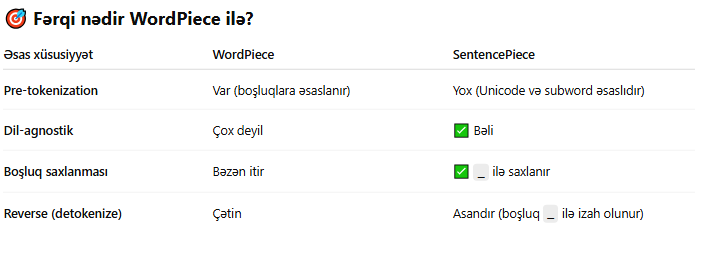

In [ ]:
''.join(xlmr_tokens).replace('\u2581'," ") #bu _ xettin kodud unicod \u2581

'<s> Jack Sparrow love New York</s>'

# Creating a Custom Model for Token Classification

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput #bir tensor qaytarir , tensoru suzgunnformat--> spesifik format loss, bu o
from transformers.models.roberta.modeling_roberta import RobertaModel #xlmRobert adah asan olardi , amma arxitektura eynu, biz amma xlm weightlerin yukleyirik
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel #weight initilizer

In [ ]:
from transformers import XLMRobertaModel
from transformers import Trainer # Make sure Trainer is imported here if not already

In [ ]:
# Head--> Ber for ne uchun Body oyrenib Head 0 dan  , onu oyredirik, bizde HEAd olamsa?? HUggingFace 'token classificton'--body+head-NER-di

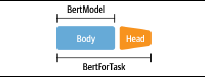

In [ ]:
#ozuumz duzeldirik
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)#-nniye burada config yazdiq--------? yazmasaq da olar vvelki versiyalrda pythonun yaizlir
        self.num_labels = config.num_labels#configine daxil ola bax gor neceh label var

        self.roberta = XLMRobertaModel(config, add_pooling_layer=False)#cls tokeni var istemirem
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        self.init_weights()#hans iactivation fln

    def forward(self, input_ids, attention_mask=None, labels=None, num_items_in_batch=None, **kwargs):
        # Added num_items_in_batch to the forward method signature
        # and it will be captured by **kwargs before being passed to the internal model.
        # We don't need to explicitly use num_items_in_batch here for this model.
        outputs = self.roberta(input_ids, attention_mask=attention_mask, **kwargs)
        sequence_output = self.dropout(outputs[0])#outputs[0]--->hidden_state
        logits = self.classifier(sequence_output)#softmaxsiz

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))#reshape output label--> 2d , cavab 1d olmalidi 4*8--32, 32-8, bu daha suretli , pytrochum matrixle ishleme , pytorch duz baxirr, view olani modifiksiya edir,


        return TokenClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions
        )

# Rest of your code remains the same
# You can now rerun the cell with trainer.train()

# Loading a Custom Model

In [ ]:
index2tag={idx:tag for idx,tag in enumerate(tags.names)}
tag2index={tag:idx for idx,tag in enumerate(tags.names)}

In [ ]:
tag2index

{'O': 0,
 'B-PER': 1,
 'I-PER': 2,
 'B-ORG': 3,
 'I-ORG': 4,
 'B-LOC': 5,
 'I-LOC': 6}

In [ ]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [ ]:
tags.names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']

In [ ]:
from transformers import AutoConfig

xlmr_config=AutoConfig.from_pretrained(xlmr_model_name,num_labels=tags.num_classes,#ne qedr layer
                                       id2label=index2tag,label2id=tag2index)#nece ves.

In [ ]:
xlmr_config

XLMRobertaConfig {
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "O",
    "1": "B-PER",
    "2": "I-PER",
    "3": "B-ORG",
    "4": "I-ORG",
    "5": "B-LOC",
    "6": "I-LOC"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "B-LOC": 5,
    "B-ORG": 3,
    "B-PER": 1,
    "I-LOC": 6,
    "I-ORG": 4,
    "I-PER": 2,
    "O": 0
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.52.4",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

In [ ]:
import torch
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')#DEVICE GPUU!!!!!!!!!!!!!!!
xlmr_model=XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name,config=xlmr_config).to(device) #heritage etdiyiu uchun pretrained olur

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#datani hazirla
input_ids=xlmr_tokenizer.encode(text, return_tensors='pt') #encode ne dirdi?? niye bele
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=['Tokens','Input IDs'])

,0,1,2,3,4,5,6,7
Tokens,<s>,▁Jack,▁Spar,row,▁love,▁New,▁York,</s>
Input IDs,0,21763,37456,15555,5161,2356,5753,2


In [ ]:
outputs=xlmr_model(input_ids.to(device)).logits
predictions=torch.argmax(outputs,dim=-1)
print(f'Number of tokens in sequence: {len(predictions[0])}')
print(f'Shape of outputs tensor: {outputs.shape}')

Number of tokens in sequence: 8
Shape of outputs tensor: torch.Size([1, 8, 7])


In [ ]:
outputs

tensor([[[-0.0325, -0.8306, -0.7019, -0.0223, -0.4026,  0.7275,  0.5574],
         [-0.2272, -0.9163, -0.4474,  0.0535, -0.2360,  0.8566,  0.7498],
         [-0.2184, -1.0068, -0.5145, -0.0437, -0.2173,  0.9016,  0.6651],
         [-0.2385, -0.9201, -0.3610,  0.0555, -0.2634,  0.8604,  0.7417],
         [-0.3387, -0.9516, -0.4692, -0.0244, -0.3014,  0.8556,  0.6299],
         [-0.3893, -0.9261, -0.3728, -0.0041, -0.3230,  0.8817,  0.6593],
         [-0.3208, -0.9565, -0.3936,  0.1040, -0.2893,  0.9438,  0.7150],
         [-0.0233, -0.8351, -0.7488, -0.0134, -0.3792,  0.7002,  0.5592]]],
       device='cuda:0', grad_fn=<ViewBackward0>)

In [ ]:
predictions

tensor([[5, 5, 5, 5, 5, 5, 5, 5]], device='cuda:0')

In [ ]:
preds=[tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens,preds],index=['Tokens','Tags'])

,0,1,2,3,4,5,6,7
Tokens,<s>,▁Jack,▁Spar,row,▁love,▁New,▁York,</s>
Tags,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC


In [ ]:
tags.names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']

In [ ]:
def tag_text(text, tags, model, tokenizer):#kecendefeki
    tokens = tokenizer(text).tokens() #Bu isə, yuxarıdakı tokenizer nəticəsindən sadəcə tokenləri çıxarır (yəni [‘play’, ‘##ing’] kimi nəticə verir).
    input_ids = tokenizer.encode(text, return_tensors='pt')#reqem kim --Bu hissə text mətnini alır və onu token ID-lərinə çevirir.Yəni sözlər → subword tokenlər → rəqəmlər (ID-lər)
    outputs = model(input_ids.to(device))[0] #last_hidden_state
    predictions = torch.argmax(outputs, dim=-1) #calssi verir yeni BIO-da hansi calssa argmaxi coxdu--> bu
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])
# text = "Obama"
# tokens = ['O', '##bam', '##a']
# input_ids = [101, 1234, 5678, 102]
#outputs=outputs.shape = [batch_size, sequence_length, num_tags]
#predictions = [[0, 2, 2, 0, 4, 5, 0, 3, 3, 0]]
# predictions = [0, 2, 2, 1]
# tags.names = ['O', 'B-PER', 'I-PER']
# preds = ['O', 'I-PER', 'I-PER', 'B-PER']

In [ ]:
# 1. tokenizer(text)
    # Bu hissə, tokenizer obyektinə text adlı mətni verir və tokenizer onu emal edir.
    # Məsələn: text = "playing"
    # Tokenizer: WordPiece, Unigram və s.
    # Nəticə: Tokenizer obyektindən çıxan bir Encoded object (məs: Encoding).

# output = (
#     last_hidden_state,     # [0] → əsas nəticə (ən çox istifadə olunan)
#     pooled_output,         # [1] → CLS tokenin çıxışı (ən çox klassifikasiya üçün istifadə olunur)
#     hidden_states (optional),
#     attentions (optional)
# )

# Tokenizing Texts for NER

In [ ]:
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]],
['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [ ]:
words, labels=de_example['tokens'], de_example['ner_tags']

In [ ]:
words

['2.000',
 'Einwohnern',
 'an',
 'der',
 'Danziger',
 'Bucht',
 'in',
 'der',
 'polnischen',
 'Woiwodschaft',
 'Pommern',
 '.']

In [ ]:
tokenized_input=xlmr_tokenizer(words, is_split_into_words=True) #sozlere bolunu b yoxsa yox, string olara false
tokens=xlmr_tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'])
pd.DataFrame([tokens,labels], index=['Tokens','Labels'])#sozler bolunu  label ile solzer ust uste duhmur

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Labels,0,0,0,0,5,6,0,0,5,5,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
tokenized_input #etxt--reqem

{'input_ids': [0, 70101, 176581, 19, 142, 122, 2290, 708, 1505, 18363, 18, 23, 122, 127474, 15439, 13787, 14, 15263, 18917, 663, 6947, 19, 6, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenized_input.word_ids()

[None,
 0,
 1,
 1,
 2,
 3,
 4,
 4,
 4,
 5,
 5,
 6,
 7,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 None]

In [ ]:
word_ids=tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=['Tokens','Word IDs'])# eyni soelr yeni reqemlerle, NONElere -100 deyeceyik,  pytorchda -100 ignore edir

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [ ]:
previous_word_idx=None
label_ids=[]

for word_idx in word_ids:
    if word_idx is None or word_idx==previous_word_idx:
        label_ids.append(-100)
    else:
        label_ids.append(labels[word_idx])
    previous_word_idx=word_idx

labels=[index2tag[l] if l!=-100 else 'IGN' for l in label_ids]
index=['Tokens','Word IDs','Label IDs','Labels']
df=pd.DataFrame([tokens, word_ids,label_ids, labels], index=index)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [ ]:
label_ids

[-100,
 0,
 0,
 -100,
 0,
 0,
 5,
 -100,
 -100,
 6,
 -100,
 0,
 0,
 5,
 -100,
 5,
 -100,
 -100,
 -100,
 6,
 -100,
 -100,
 0,
 -100,
 -100]

In [ ]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(
        examples["tokens"],
        truncation=True,
        is_split_into_words=True,
        padding=True
    )

    all_labels = []

    for i in range(len(examples["tokens"])):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        labels = []
        previous_word_idx = None
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                labels.append(-100)
            else:
                labels.append(examples["ner_tags"][i][word_idx])
            previous_word_idx = word_idx
        all_labels.append(labels)

    tokenized_inputs["labels"] = all_labels
    return tokenized_inputs


def encode_panx_dataset(corpus):
    encoded_corpus = DatasetDict()
    for split, dataset in corpus.items():
        encoded_corpus[split] = dataset.map(
            tokenize_and_align_labels,
            batched=True,  # Doğrudur burada
            remove_columns=["langs", "ner_tags", "tokens"]
        )
    return encoded_corpus


panx_de_encoded = encode_panx_dataset(panx_ch["de"])
print(panx_de_encoded["train"][0])

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

{'input_ids': [0, 70101, 176581, 19, 142, 122, 2290, 708, 1505, 18363, 18, 23, 122, 127474, 15439, 13787, 14, 15263, 18917, 663, 6947, 19, 6, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'labels': [-100, 0, 0, -100, 0, 0, 5, -100, -100, 6, -100, 0, 0, 5, -100, 5, -100, -100, -100, 6, -100, -100, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -

In [ ]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=12ab4ee87d117bf870f8bdf6a006afd8a67fcd04de211e17958f638c73cba854
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [ ]:
from seqeval.metrics import classification_report

y_true = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
y_pred = [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]

# You can now use the corrected function:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [ ]:
import numpy as np #hugging face list ichind elist gozleyir
def align_predictions(predictions, label_ids):
    preds=np.argmax(predictions, axis=2)
    batch_size, seq_len=preds.shape
    label_list, preds_list=[],[]

    for batch_idx in range(batch_size):
        example_labels, example_preds=[],[]
        for seq_idx in range(seq_len):
            if label_ids[batch_idx, seq_idx]!=-100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])
        label_list.append(example_labels)
        preds_list.append(example_preds)
    return preds_list, label_list

# Fine-Tuning XLM-RoBerta

In [ ]:
from transformers import TrainingArguments

num_epochs=3
batch_size=24
logging_steps=len(panx_de_encoded['train'])//batch_size

model_name=f'{xlmr_model_name}-finetuned-panx-de'
training_args=TrainingArguments(
    output_dir=model_name, log_level='error', num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    eval_strategy='epoch',
    save_steps=1e6, #100 000 addimdan bir save etsin yeni etmesin  her iterasiyada  save etmek istemirk, istesek epoch yaz
    weight_decay=0.01,
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=True
)

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true=align_predictions(eval_pred.predictions, eval_pred.label_ids)
    return {'f1':f1_score(y_true, y_pred)} #butun duhmeldui ust uste

In [ ]:
from transformers import DataCollatorForTokenClassification #Ner uchun Pad etmeye, her defe ramd ayer tutur model , funkdiyani ichine yukleyek modlei ordan caqirsin

# Correct the typo in the class name
data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [ ]:
def model_init():
    return XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name,
                                                            config=xlmr_config).to(device)

In [ ]:
from transformers import Trainer

trainer=Trainer(model_init=model_init,
                args=training_args, #compile
                data_collator=data_collator,#nece pad
                compute_metrics=compute_metrics, #hani metrics
                train_dataset=panx_de_encoded['train'],
                eval_dataset=panx_de_encoded['validation'],
                tokenizer=xlmr_tokenizer)

<ipython-input-58-504765348>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer=Trainer(model_init=model_init,


In [ ]:
trainer.train()
# trainer.push_to_hub(config)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ulyaaliyeva206 (ulyaaliyeva206-unec) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,F1
1,0.257000,0.156158,0.821163
2,0.127100,0.137903,0.852303
3,0.078600,0.136167,0.866629


TrainOutput(global_step=1575, training_loss=0.15408172292368752, metrics={'train_runtime': 1174.3665, 'train_samples_per_second': 32.136, 'train_steps_per_second': 1.341, 'total_flos': 2336474234136768.0, 'train_loss': 0.15408172292368752, 'epoch': 3.0})

In [ ]:
# trainer.push_to_hub()

In [ ]:
df = pd.DataFrame(trainer.state.log_history)[['epoch', 'loss', 'eval_loss', 'eval_f1']]
df = df.rename(columns={'eval_loss':'Validation_loss',
                      'loss':'Training Loss', 'epoch':'Epoch', 'eval_f1':'F1'})
df['Epoch'] = df['Epoch'].apply(lambda x:round(x))
df['Training Loss'] = df['Training Loss'].ffill()
df[['Validation_loss','F1']] = df[['Validation_loss','F1']].bfill().ffill()
df.drop_duplicates()

,Epoch,Training Loss,Validation_loss,F1
0,1,0.2570,0.156158,0.821163
2,2,0.1271,0.137903,0.852303
4,3,0.0786,0.136167,0.866629


In [ ]:
text_de = "Jack Dean ist ein Informatiker bei Google in Kallifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Tokens,<s>,▁Jack,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kalli,for,ni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,I-LOC,O


# Error Analysis

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    batch = data_collator(features)
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    with torch.no_grad():
        output = trainer.model(input_ids, attention_mask)
        predicted_label = torch.argmax(output.logits, axis = -1).cpu().numpy()

        loss = cross_entropy(output.logits.view(-1, 7),
                             labels.view(-1), reduction = 'none')
        loss = loss.view(len(input_ids), -1).cpu().numpy()

        return {'loss': loss, 'predicted_label': predicted_label}

In [ ]:
valid_set = panx_de_encoded['validation']
valid_set = valid_set.map(forward_pass_with_label, batched = True, batch_size = 32)
df = valid_set.to_pandas()
df

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

,input_ids,attention_mask,labels,loss,predicted_label
0,"[0, 10699, 11, 15, 16104, 1388, 2, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 3, -100, 4, 4, 4, -100, -100, -100, -10...","[0.0, 0.0058418014, 0.0, 0.0061878054, 0.00533...","[4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
1,"[0, 56530, 25216, 30121, 152385, 19229, 83982,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, -100, -100, -100, -100, 3, -100, -10...","[0.0, 0.00023552982, 0.0, 0.0, 0.0, 0.0, 1.240...","[0, 0, 0, 0, 0, 0, 5, 6, 6, 6, 6, 6, 6, 6, 6, ..."
2,"[0, 159093, 165, 38506, 122, 153080, 29088, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[-100, 0, 0, 0, 0, 3, -100, -100, 0, -100, 0, ...","[0.0, 0.00017295772, 0.00010203794, 0.00015639...","[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 16459, 242, 5106, 6, 198715, 5106, 242, 2,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[-100, 0, 0, 0, 5, -100, 0, 0, -100, -100, -10...","[0.0, 0.00025674384, 0.00021050144, 0.00024709...","[0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 11022, 2315, 7418, 1079, 8186, 57242, 97, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 3, ...","[0.0, 0.000119082986, 0.00012659225, 0.0001478...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, ..."
...,...,...,...,...,...
6285,"[0, 10333, 599, 7418, 4180, 72, 3700, 542, 900...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, -10...","[0.0, 0.00011288482, 0.00010287233, 0.00011610...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, ..."
6286,"[0, 15497, 7, 91243, 15, 23924, 96220, 1388, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[-100, 5, -100, -100, 6, 6, 6, 6, -100, -100, ...","[0.0, 0.026759809, 0.0, 0.0, 0.025903022, 0.02...","[6, 5, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, ..."
6287,"[0, 1858, 566, 12241, 729, 4598, 89841, 68125,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, -100, 0, -100, -100, 0, 0, ...","[0.0, 0.000110143315, 0.00010799778, 0.0001153...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6288,"[0, 132005, 11399, 7, 84974, 168, 34525, 84247...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[-100, 0, 0, -100, 0, 0, 5, 6, 0, 0, -100, -10...","[0.0, 0.00015698631, 0.00065472146, 0.0, 0.000...","[0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
index2tag[-100] = 'IGN'

df['input_tokens'] = df['input_ids'].apply(lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
df['predicted_label'] = df['predicted_label'].apply(lambda x: [index2tag[i] for i in x])
df['labels'] = df['labels'].apply(lambda x: [index2tag[i] for i in x])
df['loss'] = df.apply(lambda x: x['loss'][:len(x['input_ids'])], axis = 1)
df['predicted_label'] = df.apply(lambda x: x['predicted_label'][:len(x['input_ids'])], axis = 1)
df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN, IG...","[0.0, 0.0058418014, 0.0, 0.0061878054, 0.00533...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-O...","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>, <pa..."


In [ ]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens['loss'] = df_tokens['loss'].astype(float).round(2)
df_tokens.head(7)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,B-ORG,0.01,B-ORG,▁Ham
0,15,1,I-ORG,0.01,I-ORG,▁(
0,16104,1,I-ORG,0.01,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.01,I-ORG,▁)
1,56530,1,O,0.00,O,▁WE
1,83982,1,B-ORG,1.24,B-LOC,▁Luz
1,10,1,I-ORG,1.96,I-LOC,▁a


In [ ]:
(
    df_tokens.groupby('input_tokens')[['loss']]
    .agg(['count', 'mean', 'sum'])
    .droplevel(level = 0, axis = 1)
    .sort_values(by = 'sum', ascending = False)
    .reset_index()
    .head(10)
    .T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁in,▁der,▁von,▁/,▁und,▁(,▁),▁'',▁A
count,6066,989,1388,808,163,1171,246,246,2898,125
mean,0.03351,0.158615,0.091016,0.136757,0.664049,0.079189,0.345894,0.311829,0.025069,0.44808
sum,203.27,156.87,126.33,110.5,108.24,92.73,85.09,76.71,72.65,56.01


In [ ]:
(
    df_tokens.groupby('labels')[['loss']]
    .agg(['count', 'mean', 'sum'])
    .droplevel(level = 0, axis = 1)
    .sort_values(by = 'sum', ascending = False)
    .reset_index()
    .round(2)
    .T
)

,0,1,2,3,4,5,6
labels,I-ORG,B-ORG,O,B-LOC,I-LOC,I-PER,B-PER
count,3820,2683,43648,3172,1462,4139,2893
mean,0.49,0.58,0.03,0.33,0.6,0.21,0.27
sum,1854.86,1566.42,1364.84,1032.9,882.01,852.02,788.3


In [ ]:
1-np.log(1/7) #bu qeder sehv ederdi eger hecne oyrenmeseydi

np.float64(2.9459101490553135)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize = 'true')
    fig, ax = plt.subplots(figsize = (6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    disp.plot(cmap = plt.cm.Purples, values_format = '.2f', ax = ax, colorbar = False)
    plt.title("Confusion matrix")
    plt.show()

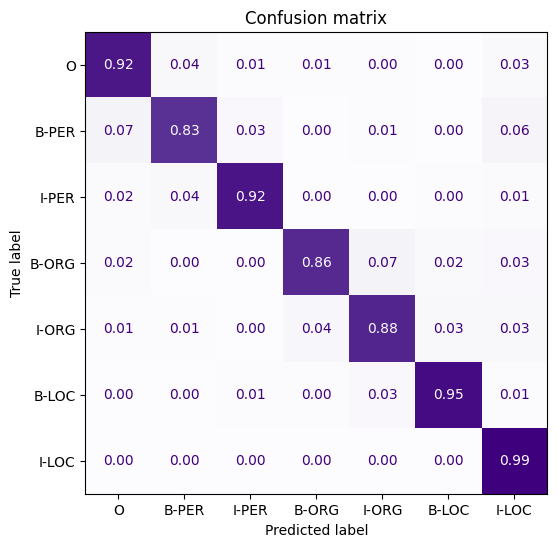

In [ ]:
plot_confusion_matrix(df_tokens['predicted_label'],
                      df_tokens['labels'], tags.names)

In [ ]:
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row['attention_mask']):
            if i not in {0, len(row['attention_mask']) - 1}:
                labels.append(row['labels'][i])
                preds.append(row['predicted_label'][i])
                tokens.append(row['input_tokens'][i])
                losses.append(f"{row['loss'][i]:.2f}")

        df_tmp = pd.DataFrame({'tokens': tokens, 'labels': labels,
                               'preds' : preds, 'losses': losses}).T
        yield df_tmp

df['total_loss'] = df['loss'].apply(sum)
df_tmp = df.sort_values(by = 'total_loss', ascending = False).head(3)

for sample in get_samples(df_tmp):
    display(sample)
#silver label - basga model terefinden labellanib
#golden label - insan terefinden labellanib

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',...,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,...,IGN,IGN,IGN,IGN,IGN,IGN,IGN,IGN,IGN,IGN
preds,O,O,B-ORG,I-ORG,O,O,O,O,O,O,...,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,5.27,0.00,0.00,0.00,10.84,9.30,9.43,8.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,...,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,...,IGN,IGN,IGN,IGN,IGN,IGN,IGN,IGN,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,...,O,O,O,O,O,O,O,O,O,O
losses,7.72,0.00,0.00,6.98,8.70,9.36,6.88,0.00,7.79,9.37,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,...,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,...,IGN,IGN,IGN,IGN,IGN,IGN,IGN,IGN,IGN,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,...,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,6.86,6.49,6.35,0.00,6.25,0.00,6.03,0.00,5.96,6.12,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#Cross-Lingual Transfer

In [ ]:
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics['test_f1']

In [ ]:
f1_scores = defaultdict(dict) #adi dict kimi, yoxdusa error qaytarmir
f1_scores['de']['de'] = get_f1_score(trainer, panx_de_encoded['test'])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

F1-score of [de] model on [de] dataset: 0.867


In [ ]:
text_fr = "Jeff Dean est informaticien ches Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁che,s,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [ ]:
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds['test'])

In [ ]:
f1_scores['de']['fr'] = evaluate_lang_performance('fr', trainer)
print(f"F1-score pf [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

F1-score pf [de] model on [fr] dataset: 0.701


In [ ]:
f1_scores['de']['it'] = evaluate_lang_performance('it', trainer)
print(f"F1-score pf [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

F1-score pf [de] model on [it] dataset: 0.683


In [ ]:
f1_scores['de']['en'] = evaluate_lang_performance('en', trainer)
print(f"F1-score pf [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

F1-score pf [de] model on [en] dataset: 0.595


#When does zero-shot transfer make sense

In [ ]:
def train_on_subset(dataset, num_samples):
    train_ds=dataset['train'].shuffle(seed=42).select(range(num_samples))
    valid_ds=dataset['validation']
    test_ds=dataset['test']
    training_args.logging_steps=len(train_ds)//batch_size

    trainer=Trainer(model_init=model_init, args=training_args,
                    data_collator=data_collator,
                    compute_metrics=compute_metrics,
                    train_dataset=train_ds, eval_dataset=valid_ds,
                    processing_class=xlmr_tokenizer)
    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub(commit_message='Training completde')

    subset_f1_score = get_f1_score(trainer, test_ds)

    # Return the renamed local variable
    return pd.DataFrame.from_dict({'num_samples':[len(train_ds)],'f1_score':[subset_f1_score]})

In [ ]:
panx_fr_encoded = encode_panx_dataset(panx_ch['fr'])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

In [ ]:
training_args.push_to_hub=False
metrics_df=train_on_subset(panx_fr_encoded,250)
metrics_df

Epoch,Training Loss,Validation Loss,F1
1,1.649900,1.343252,0.001712
2,1.250400,1.059174,0.172672
3,1.027800,0.960814,0.230330


,num_samples,f1_score
0,250,0.22605


In [ ]:
for num_samples in [500,1000,2000,4000]:
    metrics_df=pd.concat([metrics_df, train_on_subset(panx_fr_encoded, num_samples)], ignore_index=True)

Epoch,Training Loss,Validation Loss,F1
1,1.426300,0.970359,0.317760
2,0.826400,0.656759,0.603703
3,0.568100,0.556923,0.664750


Epoch,Training Loss,Validation Loss,F1
1,1.102700,0.530733,0.684364
2,0.473300,0.404460,0.734747
3,0.301000,0.373643,0.767916


Epoch,Training Loss,Validation Loss,F1
1,0.748400,0.376913,0.754993
2,0.313100,0.325100,0.782623
3,0.205600,0.334042,0.817359


Epoch,Training Loss,Validation Loss,F1
1,0.567900,0.348889,0.779123
2,0.285200,0.288898,0.822185
3,0.178700,0.275341,0.835036


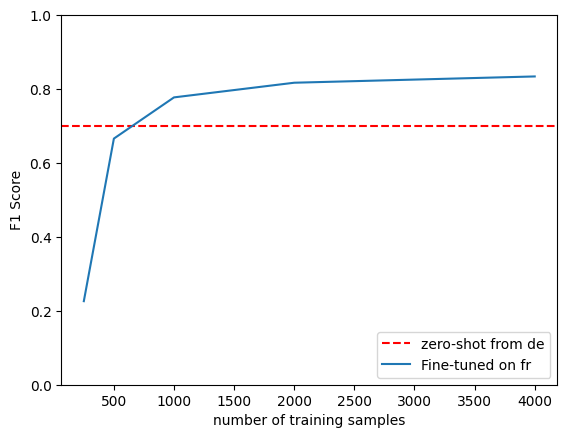

In [ ]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots()
# Rename the dictionary variable to avoid conflict with the function name
ax.axhline(f1_scores['de']['fr'], ls='--', color='r') # Corrected variable name
metrics_df.set_index('num_samples').plot(ax=ax)
plt.legend(['zero-shot from de', 'Fine-tuned on fr'], loc='lower right')
plt.ylim((0,1))
plt.xlabel('number of training samples')
plt.ylabel('F1 Score')
plt.show()

In [ ]:
#Fine-tuning on Multiple Languages at once

In [ ]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus=DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split]=concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus

In [ ]:
panx_de_fr_encoded=concatenate_splits([panx_de_encoded, panx_fr_encoded])

In [ ]:
training_args.logging_steps=len(panx_de_fr_encoded['train'])//batch_size
training_args.push_to_hub=False
training_args.output_dir='xlm-roberta-base-finetuned-panx-de-fr'

trainer=Trainer(model_init=model_init, args=training_args,
                data_collator=data_collator, compute_metrics=compute_metrics,
                processing_class=xlmr_tokenizer, train_dataset=panx_de_fr_encoded['train'],
                eval_dataset=panx_de_fr_encoded['validation'])
trainer.train()

Epoch,Training Loss,Validation Loss


In [ ]:
for lang in langs:
    f1=evaluate_lang_performance(lang, trainer)
    print(f'F1-score of [de-fr] model on [{lang}] dataset:{f1:.3f}')